<a href="https://colab.research.google.com/github/SammriddhGupta/ML-web-app/blob/main/LHD_Build_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/train.csv')

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
1,13019,6070.0,Simsbury,CT,1.641283e+12,3.0,3.0,2200.0,CONDO,PENDING,0.00,sqft,"18 Brettonwood Dr, Simsbury, CT 06070",399900.0
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,21575,2907.0,Providence,RI,1.640678e+12,2.0,3.0,1600.0,SINGLE_FAMILY,RECENTLY_SOLD,3600.00,sqft,"246 Roger Williams Ave, Providence, RI 02907",305000.0
23630,5390,21703.0,Frederick,MD,1.641197e+12,2.0,3.0,1232.0,SINGLE_FAMILY,PENDING,0.94,acres,"3039 Ballenger Creek Pike, Frederick, MD 21703",290000.0
23631,860,85302.0,Glendale,AZ,1.641370e+12,2.0,3.0,1605.0,SINGLE_FAMILY,RECENTLY_SOLD,6150.00,sqft,"6614 W Golden Ln, Glendale, AZ 85302",305000.0
23632,15795,85138.0,Maricopa,AZ,1.641456e+12,2.0,2.0,1810.0,SINGLE_FAMILY,RECENTLY_SOLD,8713.00,sqft,"19721 N Flamingo Rd, Maricopa, AZ 85138",360000.0


In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/train.csv', index_col='id')
train.head()

,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
id,,,,,,,,,,,,,
20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
13019,6070.0,Simsbury,CT,1.641283e+12,3.0,3.0,2200.0,CONDO,PENDING,0.00,sqft,"18 Brettonwood Dr, Simsbury, CT 06070",399900.0
9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0


In [ ]:
len(train)

23634

In [ ]:
train.columns

Index(['zipcode', 'city', 'state', 'dateSold', 'bathrooms', 'bedrooms',
       'livingArea', 'homeType', 'homeStatus', 'lotArea', 'lotUnit', 'address',
       'price'],
      dtype='object')

In [ ]:
for column in train.columns:
  print(column)
  print(train[column].value_counts().nlargest(5))
  print()

zipcode
82001.0    103
82009.0     68
99504.0     62
99577.0     60
83709.0     56
Name: zipcode, dtype: int64

city
Anchorage       318
Louisville      224
Cheyenne        205
Las Vegas       199
Indianapolis    198
Name: city, dtype: int64

state
CT    938
IN    885
GA    862
DE    845
IA    832
Name: state, dtype: int64

dateSold
1.640851e+12    4724
1.641542e+12    3566
1.641456e+12    2444
1.641370e+12    1870
1.640765e+12    1735
Name: dateSold, dtype: int64

bathrooms
2.0    10563
3.0     6628
1.0     4018
4.0     1643
5.0      294
Name: bathrooms, dtype: int64

bedrooms
3.0    11286
4.0     5751
2.0     4161
5.0     1309
1.0      630
Name: bedrooms, dtype: int64

livingArea
1200.000000    150
1954.681419    117
1800.000000    107
960.000000      96
1400.000000     95
Name: livingArea, dtype: int64

homeType
SINGLE_FAMILY    19067
CONDO             2117
TOWNHOUSE         1922
MULTI_FAMILY       528
Name: homeType, dtype: int64

homeStatus
RECENTLY_SOLD    23148
PENDING          

In [ ]:
train_only_sold = train[train['homeStatus'] == 'RECENTLY_SOLD'].copy()
train_only_sold.head()

,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
id,,,,,,,,,,,,,
20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
21279,80241.0,Thornton,CO,1.640851e+12,3.0,2.0,1926.0,TOWNHOUSE,RECENTLY_SOLD,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


In [ ]:
train_only_sold.drop(['homeStatus', 'address' , 'dateSold'], inplace=True, axis=1)

train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
id,,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


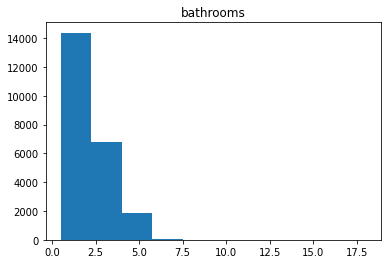

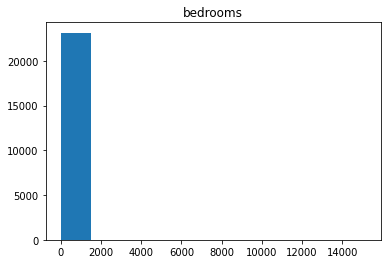

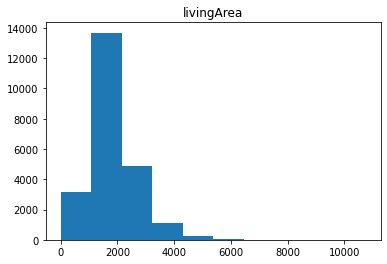

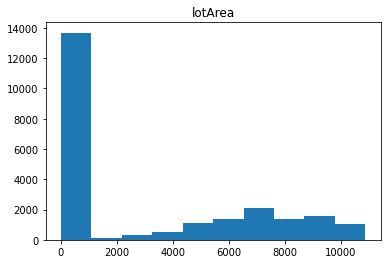

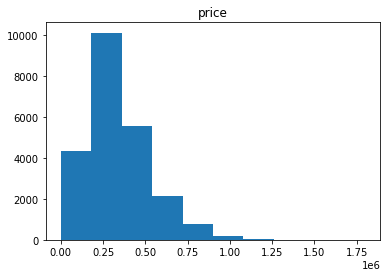

In [ ]:
numerical_columns = [ 'bathrooms' , 'bedrooms' , 'livingArea', 'lotArea' , 'price']

for column in numerical_columns:
  plt.title(column)
  plt.hist(train_only_sold[column])
  plt.show()

In [ ]:
train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
id,,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


In [ ]:
# we wanna convert square feet to an acre in the lotArea col
square_feet_in_acre = 43560

def convert_lot_area(row):
  if row['lotUnit'] == 'acres':
    return row['lotArea'] * square_feet_in_acre
  else:
    return row['lotArea']

train_only_sold['lotArea'] = train_only_sold.apply(convert_lot_area, axis=1)

train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
id,,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,acres,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


In [ ]:
train_only_sold.drop('lotUnit',axis=1,inplace=True)
train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price
id,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0


In [ ]:
bedroom_mean = train_only_sold['bedrooms'].mean()

In [ ]:
bedroom_std_x_3 = train_only_sold['bedrooms'].std() * 3

In [ ]:
bedroom_std_x_3

298.7398864510935

In [ ]:
distance_from_mean = np.abs(train_only_sold['bedrooms']distance_from_mean < 30].copy()

In [ ]:
train_no_outliers = train_only_sold[np.abs(train_only_sold['bedrooms'] - bedroom_mean) < bedroom_std_x_3]

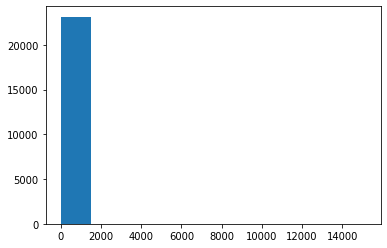

In [ ]:
plt.hist(train_only_sold['bedrooms'])
plt.show()

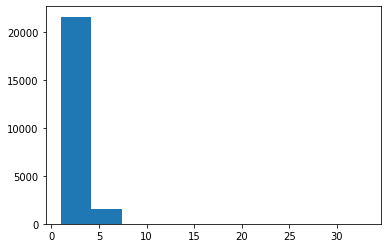

In [ ]:
plt.hist(train_no_outliers['bedrooms'])
plt.show()

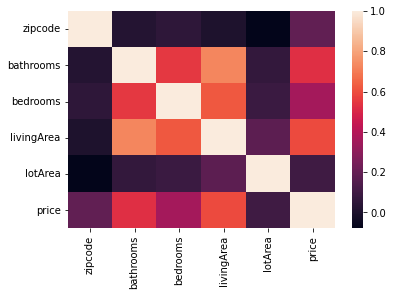

In [ ]:
sns.heatmap(train_no_outliers.corr())

In [ ]:
# one hot encoding
# we use get_dummies to convert to 0 and 1 for one-hot encoding

train_home_type_encoded = pd.get_dummies(train_no_outliers, columns=['homeType'])

In [ ]:
median_income_by_zipcode = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/median_income_by_zip_code.csv')
median_income_by_zipcode.head()

,median_income,zip_code
0,9419,601
1,9963,602
2,10520,603
3,10272,606
4,12352,610


In [ ]:
merged_df  = pd.merge(train_no_outliers, median_income_by_zipcode, how='left', left_on='zipcode', right_on='zip_code')
merged_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price,median_income,zip_code
0,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0,46658.0,76247.0
1,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0,57188.0,85340.0
2,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0,66044.0,99507.0
3,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,551900.0,46016.0,3901.0
4,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0,65217.0,80241.0


In [ ]:
merged_df = merged_df.drop(['zipcode', 'zip_code'],axis=1)

merged_df

,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price,median_income
0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0,46658.0
1,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0,57188.0
2,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0,66044.0
3,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,551900.0,46016.0
4,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0,65217.0
...,...,...,...,...,...,...,...,...,...
23142,Macon,GA,2.0,3.0,2428.0,SINGLE_FAMILY,7840.80,175000.0,21375.0
23143,Providence,RI,2.0,3.0,1600.0,SINGLE_FAMILY,3600.00,305000.0,33125.0
23144,Glendale,AZ,2.0,3.0,1605.0,SINGLE_FAMILY,6150.00,305000.0,30005.0
23145,Maricopa,AZ,2.0,2.0,1810.0,SINGLE_FAMILY,8713.00,360000.0,50044.0
